In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Reads the adjacency matrix from file
A = np.loadtxt('adjacency.txt')
print(f'There are {A.shape[0]} nodes in the graph.')

There are 328 nodes in the graph.


As you can see above, the adjacency matrix is relatively large (328x328): there are 328 persons in the graph. In order to visualize this adjacency matrix, it is convenient to use the 'imshow' function. This plots the 328x328 image where the pixel (i,j) is black if and only if A[i,j]=1.

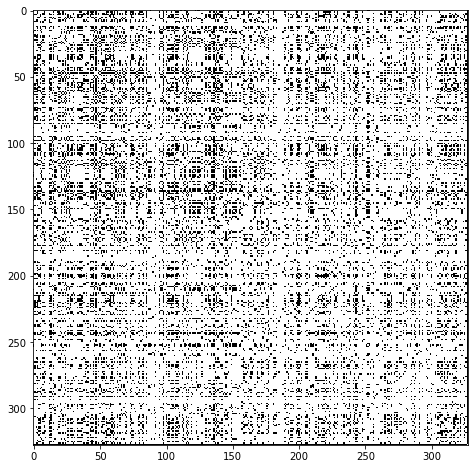

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(A,aspect='equal',cmap='Greys',  interpolation='none')

In [8]:
len()

328

**(a)** Construct in the cell below the degree matrix:
$$
D_{i,i} = {\rm deg}(i) \qquad \text{and} \qquad D_{i,j} = 0 \ \ \text{if} \ i \neq j,
$$
the Laplacian matrix:
$$
L = D - A
$$
and the normalized Laplacian matrix:
$$
L_{\rm norm} = D^{-1/2} L D^{-1/2}.
$$

In [12]:
degrees=A.sum(axis=1)
D=np.diag(degrees)
L=D-A
from scipy.linalg import fractional_matrix_power
L_norm=fractional_matrix_power(D,-1/2)@L@fractional_matrix_power(D,-1/2)
L_norm

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.01064251],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.00606998],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.01628656, -0.00685914],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.00680698],
       [ 0.        ,  0.        , -0.01628656, ...,  0.        ,
         1.        , -0.00726126],
       [-0.01064251, -0.00606998, -0.00685914, ..., -0.00680698,
        -0.00726126,  1.        ]])

**(b)** Using the command 'linalg.eigh' from numpy, compute the eigenvalues and the eigenvectors of $L_{\rm norm}$.

In [16]:
eigenvalue, eigenvector=np.linalg.eigh(L_norm)

**(c)** We would like to cluster the nodes (i.e. the users) in 3 groups. Using the eigenvectors of $L_{\rm norm}$, assign to each node a point in $\mathbb{R}^2$. 

In [24]:
eig_decomp={}
for i in np.arange(0,len(eigenvalue),1):
    key=eigenvalue[i]
    value=eigenvector[:,i]
    eig_decomp[key]=value

sorted_eig_decomp=dict(sorted(eig_decomp.items(),reverse=False))
sorted_eig_decomp
lambdas=sorted_eig_decomp.keys()

In [28]:
l2=list(lambdas)[1]
l3=list(lambdas)[2]
v2=eig_decomp[l2]
v3=eig_decomp[l3]

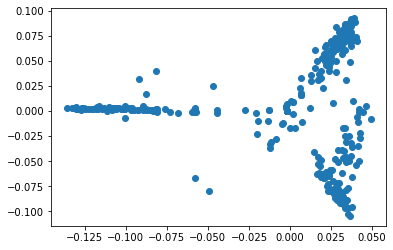

In [29]:
#x coordinates of x1, x2, ..., xn are entries of v2
#y coordinates of x1, x2, ..., xn are entries of v3
x=v2
y=v3
plt.scatter(x,y)

**(d)** Using the K-means algorithm, cluster the embeddings in $\mathbb{R}^2$ of the nodes in 3 groups.

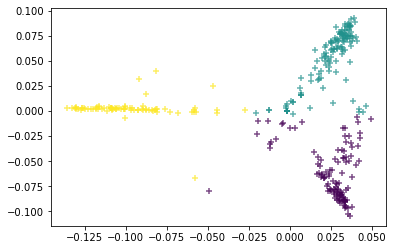

In [36]:
X=[[x,y] for x, y in zip(v2,v3)]
X=np.array(X)

# Each row corresponds to a data point
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels=kmeans.labels_
# labels contains the membership of each node 0,1 or 2

# This colors each point of R^2 according to its label
# replace "x/y coordinates" by the coordinates you computed in (c) 
plt.scatter( x,y, alpha=0.7, marker='+', c = labels)

**(e)** Re-order the adjacency matrix according to the clusters computed in the previous question. That is, reorder the columns and rows of $A$ to obtain a new adjacency matrix (that represents of course the same graph) such that the $n_1$ nodes of the first cluster correspond to the first $n_1$ rows/columns, the $n_2$ nodes of the second cluster correspond to the next $n_2$ rows/columns, and the $n_3$ nodes of the third cluster correspond to the last $n_3$ rows/columns.
Plot the reordered adjacency matrix using 'imshow'.

In [48]:
labels=list(labels)
label1_index=[i for i in np.arange(0,len(labels))if labels[i]==0 ]
label2_index=[i for i in np.arange(0,len(labels))if labels[i]==1 ]
label3_index=[i for i in np.arange(0,len(labels))if labels[i]==2 ]
new_order=label1_index+label2_index+label3_index

In [50]:
A=A[:, new_order]
A=A[new_order, :]

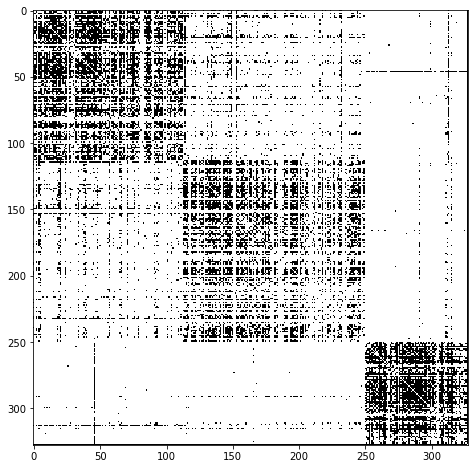

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(A,aspect='equal',cmap='Greys',  interpolation='none')